## 1. Test and filter outliers

In [2]:
import pandas as pd
#pd.set_option('chained_assignment',None)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
def find_type_outliers(df): #find outlier according to the msprice range of individual Crop Type
    types=list(df["Type"].unique())
    for typ in types:
        data_temp=df[df["Type"]==typ] # Entire data of one type of crop
        actual=len(data_temp) # Total instances of each crop type
        q1 = data_temp["msprice"].quantile(0.25)
        q3 = data_temp["msprice"].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        lower_threshold  = q1-1.5*iqr
        upper_threshold = q3+1.5*iqr
        data_filter=data_temp[(data_temp["msprice"] > lower_threshold) & (data_temp["msprice"] < upper_threshold)]
        filtered=len(data_filter)
        if actual!=filtered:
            print(typ)
        else:
            print("No outlier found in ",typ)

In [3]:
def plot_commodity_outliers(df): #plot commodity price outliers in a particular type 
    commodities=list(df["commodity"].unique())
    flag=0
    for commodity in commodities:
        data_temp=df[df["commodity"]==commodity] # taking one type of commodity in one iteration
        actual=len(data_temp)
        if actual>1 :
            q1 = data_temp["msprice"].quantile(0.25)
            q3 = data_temp["msprice"].quantile(0.75)
            iqr = q3-q1 #Interquartile range
            lower_threshold  = q1-1.5*iqr
            upper_threshold = q3+1.5*iqr
            data_filter=data_temp[(data_temp["msprice"] > lower_threshold) & (data_temp["msprice"] < upper_threshold)]
            filtered=len(data_filter)
            if actual!=filtered:
                flag=1
                plt.figure(figsize=(6,4))
                plt.title(commodity)
                sns.boxplot(x="commodity", y="msprice",data=data_filter) #box plot
                sns.stripplot(x="commodity", y="msprice",data=data_temp,
                                 jitter=True,marker='o',alpha=0.5,color='red') #overlay data points (show outliers which are not compensated)
                patch_1 = mpatches.Patch(color='#31749F', label=commodity)
                patch_2 = mpatches.Patch(color='red',alpha=0.5,label='Data Points')
                plt.legend(handles=[patch_1,patch_2])
                plt.show()
    if flag==0:
        print("No commodity price outlier in ",df["Type"].iloc[0] )

In [4]:
def remove_outlier_cmo(df): #find outlier according to the msprice of commodity and remove them
    data_main=pd.DataFrame()
    commodities=list(df["commodity"].unique())
    for commodity in commodities:
        data_temp=df[df["commodity"]==commodity]
        actual=len(data_temp)
        if actual>1:
            q1 = data_temp["msprice"].quantile(0.25)
            q3 = data_temp["msprice"].quantile(0.75)
            iqr = q3-q1 #Interquartile range
            lower_threshold  = q1-1.5*iqr
            upper_threshold = q3+1.5*iqr
            data_temp = data_temp.loc[(data_temp['msprice'] > lower_threshold) & (data_temp['msprice'] < upper_threshold)]
            data_temp.sort_values("year",inplace=True)
            
        data_main=pd.concat([data_main,data_temp])
        data_main.reset_index(drop=True,inplace=True)
    return data_main

### Dataset:  CMO_MSP_Mandi.csv

In [3]:
df=pd.read_csv("Raw Data/CMO_MSP_Mandi.csv")
df=df.dropna(subset=["msprice"])

In [4]:
df.head(10)

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1
5,MAIZE,2012,Kharif Crops,1175.0,1
6,Ragi_Maldandi,2012,Kharif Crops,1500.0,1
7,PIGEON PEA (TUR),2012,Kharif Crops,3850.0,1
8,SPILT GERRN GRAM,2012,Kharif Crops,4400.0,1
9,SPLIT BLACK GRAM,2012,Kharif Crops,4300.0,1


### Overall Boxplot Visualization 

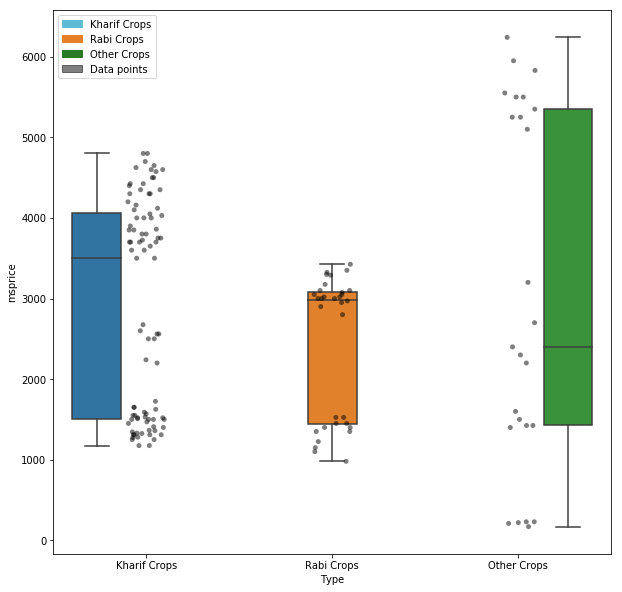

In [23]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Type", y="msprice",hue='Type',data=df) #box plot
sns.stripplot(y='msprice', x='Type',data=df,jitter=True,marker='o',alpha=0.5,color='black') #overlay data point
patch_1 = mpatches.Patch(color='#5DBCD2', label='Kharif Crops')
patch_2 = mpatches.Patch(color='#E58028', label='Rabi Crops')
patch_3 = mpatches.Patch(color='#297925', label='Other Crops')
patch_4= mpatches.Patch(color='black', label='Data points',alpha=0.5)
plt.legend(handles=[patch_1,patch_2,patch_3,patch_4])
plt.show()

### Finding outlier for  particular type of crops

In [24]:
find_type_outliers(df)

No outlier found in  Kharif Crops
No outlier found in  Rabi Crops
No outlier found in  Other Crops


### Finding outlier for individual commodities in a particular type of crop

#### Kharif Crops

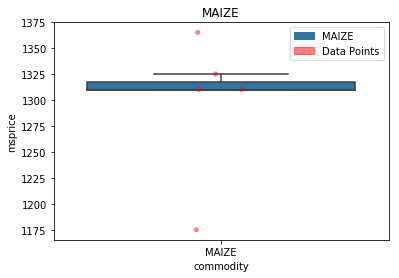

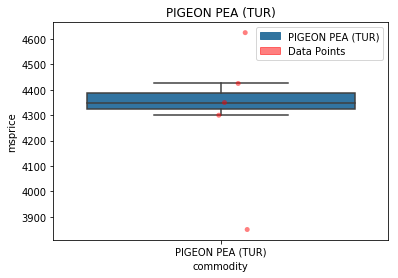

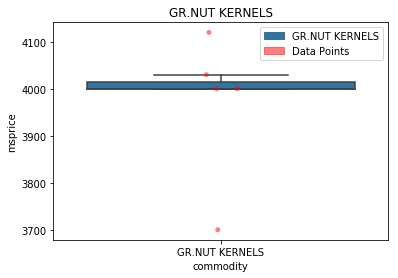

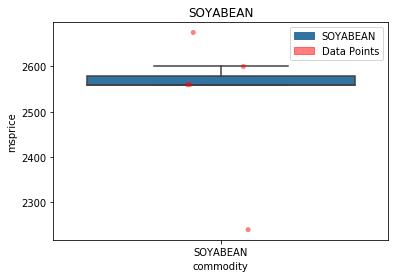

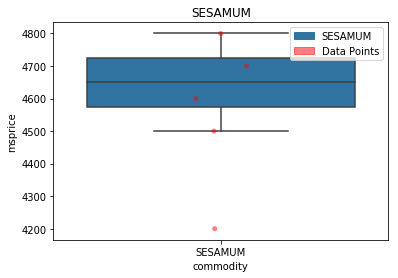

In [25]:
plot_commodity_outliers(df[df["Type"]=="Kharif Crops"])

#### Rabi Crops

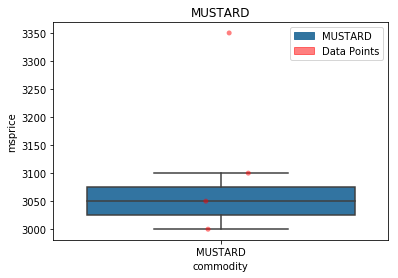

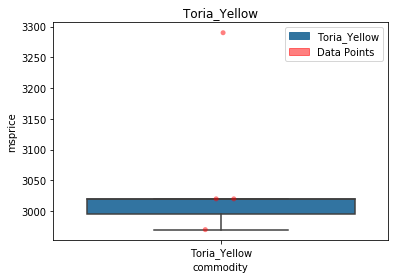

In [26]:
plot_commodity_outliers(df[df["Type"]=="Rabi Crops"])

#### Other Crops

In [27]:
plot_commodity_outliers(df[df["Type"]=="Other Crops"])

No commodity price outlier in  Other Crops


#### Remove outliers and save as csv

In [28]:
data=remove_outlier_cmo(df)
data.to_csv("CMO_MSP_Mandi_filtered.csv",index=False)

### Dataset:  Monthly_data_cmo.csv

In [12]:
def remove_outlier(df): #find outlier according to the modal price of commodity and remove them
    data_main=pd.DataFrame()
    commodities=list(df["Commodity"].unique())
    for commodity in commodities:
        data_temp=df[df["Commodity"]==commodity]
        actual=len(data_temp)
        if actual>1:
            q1 = data_temp["modal_price"].quantile(0.25)
            q3 = data_temp["modal_price"].quantile(0.75)
            iqr = q3-q1 #Interquartile range
            lower_threshold  = q1-1.5*iqr
            upper_threshold = q3+1.5*iqr
            filtered_values=[upper_threshold if x> upper_threshold else x for x in data_temp["modal_price"].tolist()]
            filtered_values=[lower_threshold if x< lower_threshold else x for x in filtered_values]
            data_temp["modal_price"]=filtered_values
            data_temp.sort_values("date",inplace=True)
            
        data_main=pd.concat([data_main,data_temp])
        data_main.reset_index(drop=True,inplace=True)
    return data_main

In [13]:
# Same as the function defined earlier but with minor tweaks corresponding to new dataset

def plot_price_outliers(df): #plot commodity price outliers in a particular type 
    commodities=list(df["Commodity"].unique())
    flag=0
    for commodity in commodities:
        data_temp=df[df["Commodity"]==commodity] # taking one type of commodity in one iteration
        actual=len(data_temp)
        if actual>1 :
            q1 = data_temp["modal_price"].quantile(0.25)
            q3 = data_temp["modal_price"].quantile(0.75)
            iqr = q3-q1 #Interquartile range
            lower_threshold  = q1-1.5*iqr
            upper_threshold = q3+1.5*iqr
            data_filter=data_temp[(data_temp["modal_price"] > lower_threshold) & (data_temp["modal_price"] < upper_threshold)]
            filtered=len(data_filter)
            if actual!=filtered:
                flag=1
                plt.figure(figsize=(6,4))
                plt.title(commodity)
                sns.boxplot(x="Commodity", y="modal_price",data=data_filter) #box plot
                sns.stripplot(x="Commodity", y="modal_price",data=data_temp,
                                 jitter=True,marker='o',alpha=0.5,color='red') #overlay data points (show outliers which are not compensated)
                patch_1 = mpatches.Patch(color='#31749F', label=commodity)
                patch_2 = mpatches.Patch(color='red',alpha=0.5,label='Data Points')
                plt.legend(handles=[patch_1,patch_2])
                plt.show()
    if flag==0:
        print("No modal price outliers found" )

In [14]:
df=pd.read_csv("Raw Data/Monthly_data_cmo.csv")
df["Commodity"]=df["Commodity"].apply( lambda x : x.lower())
df=df[df["modal_price"]!=0]
df["date"]=pd.to_datetime(df["date"])

In [15]:
df.shape

(62225, 11)

### There are 349 distinct APMC (Agriculture Produce Market Committees) 
#### Visualization of the outlier in each committee can be viewed by entering names in the below field

In [16]:
apmc = input('Enter APMC: ')
comm = input('Enter Commodity within that APMC: ')

df_temp = df[df['APMC'] == apmc]
df_temp = df_temp[df['Commodity'] == comm]

plot_price_outliers(df_temp)

Enter APMC: 
Enter Commodity within that APMC: 
No modal price outliers found


#### Remove outliers and save as csv

In [17]:
df_filtered=pd.DataFrame()
for apmc in df["APMC"].unique().tolist():
    df_temp=df[df["APMC"]==apmc]
    data=remove_outlier(df_temp)
    df_filtered=pd.concat([df_filtered,data])
    
df_filtered.shape



(62225, 11)


(62225, 11)

In [18]:
df_filtered.reset_index(drop=True,inplace=True)
df_filtered.to_csv("Monthly_data_cmo_filtered.csv",index=False)